<div class="alert alert-success">

## Instructions to students

If the assignment was fetched from the assignments tab, do not change the name of the assignment file(s).

### Code answers

In questions that require you to write code, there will be a code cell containing: 
    
<code># YOUR CODE HERE</code>
<br>
<code>raise NotImplementedError()</code>
    
When you are ready to write your answer, delete <code>raise NotImplementedError()</code> and write your code.

### Submitting your work
    
You should save your work before you submit ("Save" icon in top menu).
    
Before you submit, ensure that the notebook can be run from start to finish by pressing the "Restart & Run All" option in the "Kernel" menu above.
    
Once you are ready, go to the assignments tab on the Noteable landing page and click "Submit" on the relevant assignment.

</div>

**Question 4**: The code in the cell below has errors. There are errors preventing the code to run as intended. 

Your **task** is to find all mistakes, remove them, make the code function properly such that it presents a correct figure at the end. 

It is strongly recommended to start the exercise by copying the entire code to a separate python file and examine it in Spyder.

**Note A**: Leave the function names unchanged. Some may be assumed in tests. Constant values as given are all correct. Changes to the constant values result in scoring zero for the test and plot mark.

**Note B**: Copy your final solution back into the cell below so that the tests can run.

##### What is this code?

This fault-finding exercise shows an unseen digital filter, specialised on noticing a change in a continuously streamed signal, called an online exponential filter, dating back to early radar applications.

Change detection means the comparison of each calculated value to the previous value.  If that numerical comparison of the current value with the previous value exceeds a fixed threshold value then an alarm is raised (or the location is stored as in this exercise). This process can be implemented on a computer as a simple digital filter.

The filter takes one data item, $x_{i}$, after the other (online). 

The exponential filter function is: $y_{i}=\alpha\,y_{i-1}+(1-\alpha)\,x_{i}$. Note that there is no exponential function since this is implemented as an iterative filter.

The factor $\alpha$ is a gain factor or 'forgetfulness' factor, quantifying how much influence on the filter previous data values should have with values in the interval $0<=\alpha<=1$. Small $\alpha$ lead to hardly any smoothing and the filter will react on any change in the signal very sensitively while large $\alpha$ should show a clear change but react little on noisy input.


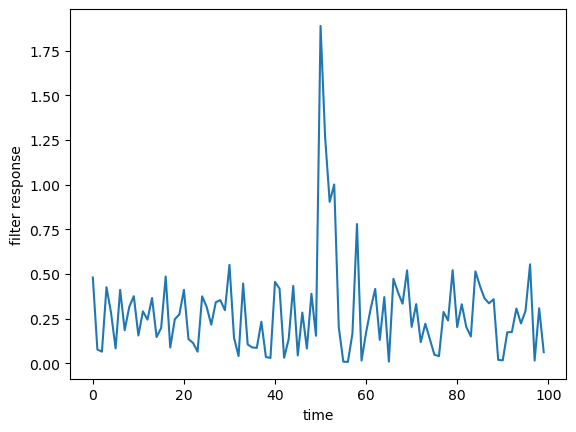

[50 51 52 53 58]


In [15]:
'''
Script: 
Demonstrate the exponential filter as a change detection method.
Note that one of the faults is at least one missing line of code in the 
changeDetect() loop.
'''
# YOUR CODE HERE

import numpy as np
import matplotlib.pyplot as plt

def expofilter(prval, data, alpha): 
    return alpha*prval + (1-alpha)*data

def changeDetect(data, alpha, threshold): 
    previousvalue = 0 # YR: fixed starter value; do not change.
    response = []
    change = []
    i = -1
    for dat in data:
        i += 1
        value = expofilter(previousvalue, dat, alpha)
        if abs(value-previousvalue)>threshold:
            change.append(i)
        response.append(abs(value-previousvalue))
        previousvalue = value
    return np.array(response), np.array(change)

# Use case and testing; 
# YR: No error below this line.
# Note that the alarm level has been chosen as given on purpose and should
# not be changed.
tseries = np.random.randint(-3,3,100)
tseries[50] = 11
tseries[51] = 9
tseries[52] = 8
alarmlevel = 0.76
gainfactor = 0.84
resp, alarms = changeDetect(tseries, gainfactor, alarmlevel)

# plotting
plt.plot(resp)
plt.xlabel('time')
plt.ylabel('filter response')
plt.show()

print (alarms)

Manual plot marking with feedback where appropriate.

In [2]:
# test, do not delete

### Tests - 2 marks; Plot - 1 mark